<a href="https://colab.research.google.com/github/souadsoo/gitgit/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction aux Machines à Vecteurs de Support (SVM)**

Les Machines à Vecteurs de Support (SVM) sont des algorithmes d'apprentissage automatique puissants utilisés pour la classification et la régression.  Elles sont particulièrement efficaces pour la classification de données non linéairement séparables grâce à l'utilisation de fonctions noyau (kernels).

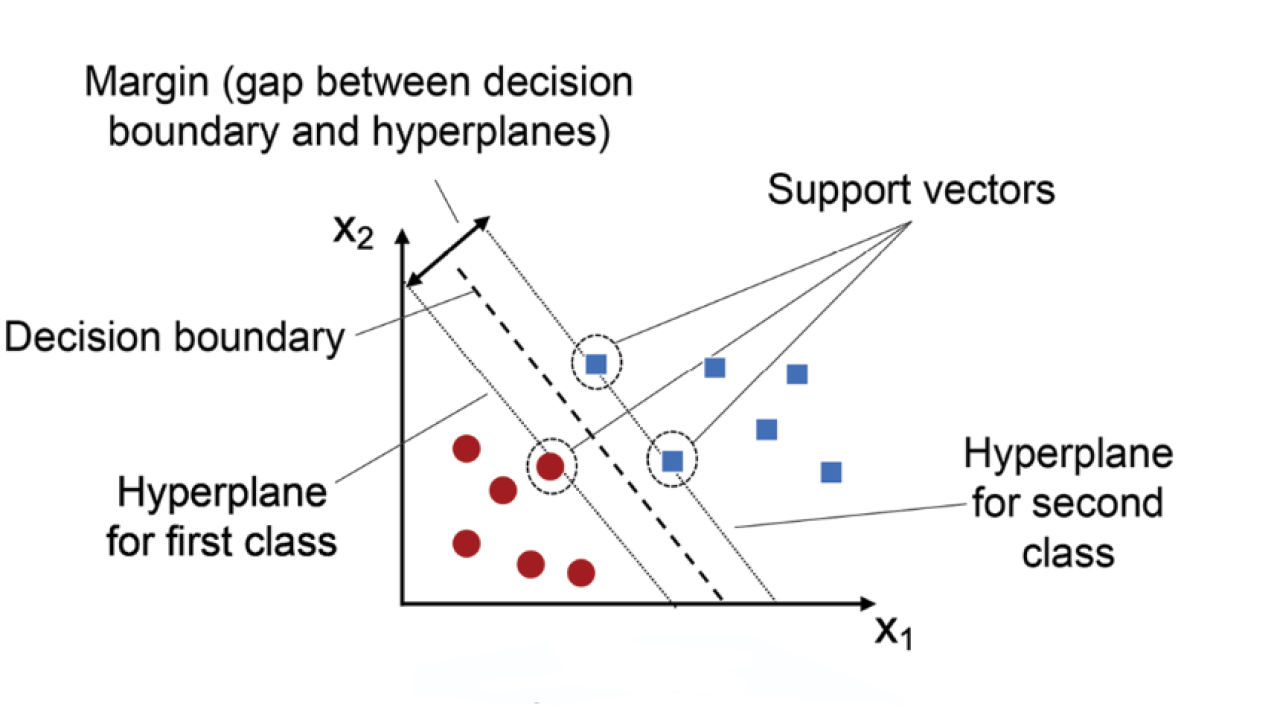


## **Principe de fonctionnement**

Le principe fondamental d'une SVM est de trouver l'hyperplan optimal qui sépare les différentes classes de données avec la marge maximale. La marge est la distance entre l'hyperplan et les points de données les plus proches de chaque classe, appelés vecteurs de support.  Un hyperplan avec une marge maximale est préférable car il minimise le risque de sur-apprentissage et améliore la généralisation du modèle à de nouvelles données.


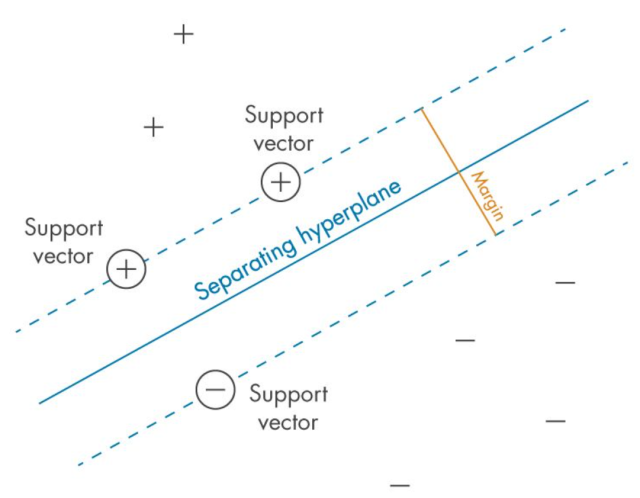

## **Fonctions noyau**

Les fonctions noyau permettent aux SVM de gérer des données non linéairement séparables en projetant les données dans un espace de dimension supérieure où elles deviennent linéairement séparables.  Différents types de fonctions noyau existent, par exemple :

* **Linéaire :** Adapté aux données linéairement séparables.**(2D)**

**(3D+)**
* **Polynomiale :**  Permet de modéliser des relations polynomiales entre les variables.
* **RBF (Radial Basis Function) :**  Très populaire et efficace pour une large variété de problèmes.  Elle permet de créer des frontières de décision non linéaires complexes.
* **Sigmoïde :**  Inspirée des réseaux de neurones.

Le choix de la fonction noyau est crucial pour les performances du modèle et dépend de la nature des données.

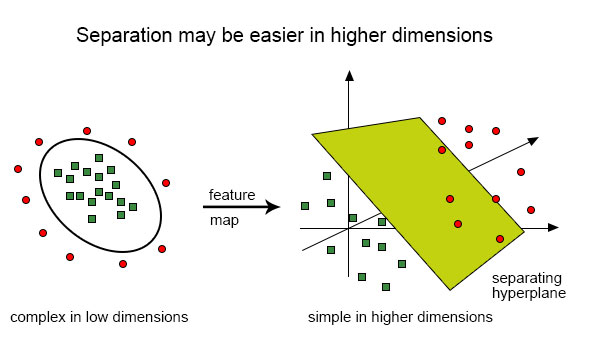

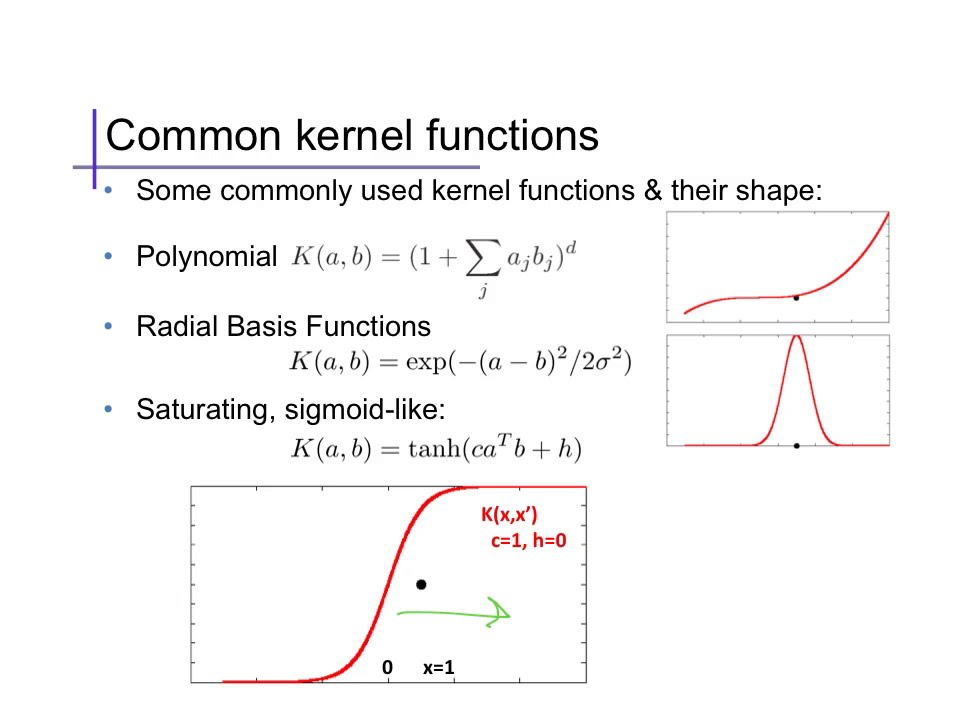

# **Utilisation des SVM**

Les SVM sont utilisées dans divers domaines, tels que :

* **Reconnaissance d'images**
* **Traitement du langage naturel**
* **Bio-informatique**
* **Finance**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
data=pd.read_csv('bill_authentication.csv')
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
!pip install pandas_profiling

In [ ]:
from ydata_profiling import ProfileReport
profile=ProfileReport(data,title='bill_authentication Report')
profile.to_file('bill_authentication Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:379: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Data cleaning:

In [ ]:
data.fillna('')

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
# Compter les doublons
data.duplicated().sum()
print("\nNombre de doublons :", data.duplicated().sum())


Nombre de doublons : 24


In [ ]:
# Identifier les doublons basés sur toutes les colonnes
print("\nLignes en double complètes :\n", data[data.duplicated()])

# Supprimer les doublons (garder la première occurrence)
data_unique = data.drop_duplicates()
print("\nDataFrame sans doublons :\n", data_unique)


Lignes en double complètes :
      Variance  Skewness  Curtosis  Entropy  Class
47    -0.7869    9.5663   -3.7867  -7.5034      0
139   -0.2062    9.2207   -3.7044  -6.8103      0
190    0.9297   -3.7971    4.6429  -0.2957      0
195   -1.8584    7.8860   -1.6643  -1.8384      0
226    0.5706   -0.0248    1.2421  -0.5621      0
268    0.9297   -3.7971    4.6429  -0.2957      0
284   -1.3000   10.2678   -2.9530  -5.8638      0
300    0.3292   -4.4552    4.5718  -0.9888      0
315    0.3292   -4.4552    4.5718  -0.9888      0
320    0.5195   -3.2633    3.0895  -0.9849      0
345   -1.8584    7.8860   -1.6643  -1.8384      0
351    0.5195   -3.2633    3.0895  -0.9849      0
352    0.3292   -4.4552    4.5718  -0.9888      0
404    0.3798    0.7098    0.7572  -0.4444      0
427   -1.3000   10.2678   -2.9530  -5.8638      0
436    0.3798    0.7098    0.7572  -0.4444      0
476    0.3798    0.7098    0.7572  -0.4444      0
498    0.5706   -0.0248    1.2421  -0.5621      0
604   -2.6479   10.

In [ ]:
data1=data.drop_duplicates()
data1

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
data1.duplicated().sum()

0

In [ ]:
data1.shape

(1348, 5)

In [ ]:
x=data.iloc[:,:-1].values #features
y=data.iloc[:,-1].values #target


In [ ]:
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Outliers:

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
classifier=SVC(kernel='linear',random_state=30) #Linear = Dimension 2
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=30)

In [ ]:
y_pred=classifier.predict(x_test) #Y=F(X)

In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[141,   1],
       [  0, 133]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       142
           1       0.99      1.00      1.00       133

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

